# Quantum Kittens Notepad

## Overview

Welcome to the Quantum Kittens notepad. 

This is a coding notepad supplement to the book [Quantum Kittens](http://quantumkittens.online), a non-technical book that teaches quantum computing through stories about cats.

Also available in [Japanese](http://quantum-kittens-ja.github.io/) and [Spanish](http://quantum-kittens-es.github.io/).


<img src='https://github.com/quantum-kittens/quantum-kittens.github.io/blob/main/assets/imgs/cover_beta.png?raw=true'/>

#### Quantum Kittens Credits:
- Author: [Radha Pyari Sandhir](https://radhapyarisandhir.com/)
- Illustrator: [Rashi Chandra](https://www.instagram.com/rashichan/)
- Japanese Translator: [Yuri Kobayashi](https://twitter.com/YuriKobaya)
- Spanish Translator: [Claudia Zendejas-Morales](https://twitter.com/clausia)
- The Cats: [Arya, Blade, Luna](https://www.instagram.com/catomictheory/)
- Editor: [Suzanne Musin](https://www.linkedin.com/in/suzannemusin/)
- Technical Reviewer: [James Weaver](https://github.com/javafxpert)


## Chapter 2 Qiskit Code

Simulate a Whiskerton marble using this code! 

This code walks you through creating and running a quantum circuit with a single qubit.

This code is associated with Quantum Kittens Chapter 2:
- [Chapter 2 - Story - Schrödinger Day](https://quantum-kittens.github.io/posts/CHAPTER-2-Story-Schr%C3%B6dinger-Day/)
- [Chapter 2 Part 2 - Commentary - Qubits, Superposition, and Measurement](https://quantum-kittens.github.io/posts/CHAPTER-2-Part-2-Qubits-Superposition-and-Measurements/)

<img src='https://github.com/quantum-kittens/quantum-kittens.github.io/blob/main/assets/imgs/Marble_Animation.png?raw=true'/>

In [2]:
# Importing necessary Qiskit libraries; run this cell first
from qiskit import QuantumCircuit, transpile
from qiskit import BasicAer
from qiskit.visualization import *

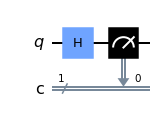

In [3]:
#Create Marble Circuit

marble_circuit = QuantumCircuit(1, 1) # add one qubit (Whiskerton marble) and one classical bit (to store the measurement outcome)

marble_circuit.h(0) # add H-gate or Hadamard gate to the qubit (this is the quantum gate that puts the marble in superposition)

marble_circuit.measure(0,0) # add a measurement operator (this is equivalent to a cat looking directly at a marble)

marble_circuit.draw('mpl') # see how the circuit looks


In [21]:
#Run Marble Circuit,
#That is, see if the marble turns red or blue

marble_state = {'1': 'red', '0': 'blue'}

simulator = BasicAer.get_backend("qasm_simulator") # Identify the quantum computer to run this on. In this case it's a simulator not a real device.

compiled_circuit = transpile(marble_circuit, simulator) # Compile the circuit down to low-level QASM instructions.

job = simulator.run(compiled_circuit, shots=1000) # Run the circuit on the simulator 1000 times to gather statistics.

# fetch and print the outcome:

result = job.result() 
counts = result.get_counts(compiled_circuit)

ans = str(max(counts, key=counts.get))

print('The marble is ' + marble_state[ans] +'.') # The outcome is the one associated with the highest count.


The marble is red.


Your result in the form of counts: {'1': 502, '0': 498}
Thus, in 1000 shots, you get blue 498 times, and red 502 times.


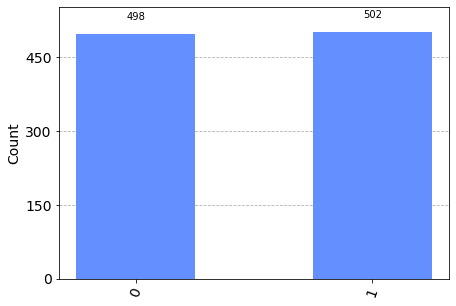

In [22]:
# Examine the statistics and plot histogram

print("Your result in the form of counts:", counts)
print("Thus, in 1000 shots, you get blue " + str(counts['0']) + " times, and red " + str(counts['1']) + " times.")

plot_histogram(counts)

## Chapter 3 Qiskit Code

Simulate a Whiskerton doorbell using this code! 

By using this code, you will learn how to create the quantum circuit corresponding to the Bell state.

This code is associated with Quantum Kittens Chapter 3:
- [Chapter 3 - Story - Doorbells](https://quantum-kittens.github.io/posts/CHAPTER-3-Story-Doorbells/)
- [Chapter 3 Part 2 - Commentary - Multiple Qubits, Entanglement, and Bell States](https://quantum-kittens.github.io/posts/CHAPTER-3-Part-2-Multiple-Qubits-Entanglement-and-Bell-States/)

<img src='https://github.com/quantum-kittens/quantum-kittens.github.io/blob/main/assets/imgs/Doorbell_Animation.png?raw=true'/>

In [2]:
# Importing necessary Qiskit libraries; run this cell first
from qiskit import QuantumCircuit, transpile
from qiskit import BasicAer
from qiskit.visualization import *

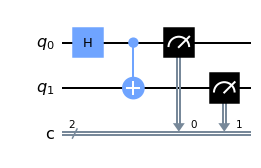

In [3]:
#Create Doorbell Entangler Circuit

doorbell_circuit = QuantumCircuit(2, 2) # Create a circuit with two qubits (Whiskerton marbles) and two classical bits (to store the measurement outcome).

doorbell_circuit.h(0) # Add a Hadamard gate to the first qubit/ 

doorbell_circuit.cx(0,1) # Add a cnot gate with the first qubit as the control and the second qubit as the target. The target flips its state when the control is in the 1 state.

doorbell_circuit.measure([0,1],[0,1]) # Add measurement operators (this is equivalent to a cat looking directly at the outer marble).

doorbell_circuit.draw('mpl') # See how the circuit looks.


In [10]:
#Run Doorbell Circuit,
#That is, see if the marbles turns red or blue

doorbell_state = {'11': 'red', '00': 'blue'}

simulator = BasicAer.get_backend("qasm_simulator") # Identify the quantum computer to run this on. In this case it's a simulator not a real device.

compiled_circuit = transpile(doorbell_circuit, simulator) # Compile the circuit down to low-level QASM instructions.

job = simulator.run(compiled_circuit, shots=1000) # Run the circuit on the simulator 1000 times to gather statistics.

# fetch and print the outcome:

result = job.result() 
counts = result.get_counts(compiled_circuit)

ans = str(max(counts, key=counts.get))

print('The marbles are both ' + doorbell_state[ans] +'.') # The outcome is the one associated with the highest count.


The marbles are both red.


Your result in the form of counts: {'11': 505, '00': 495}
Thus, in 1000 shots, you get double blues 495 times, and double reds 505 times.


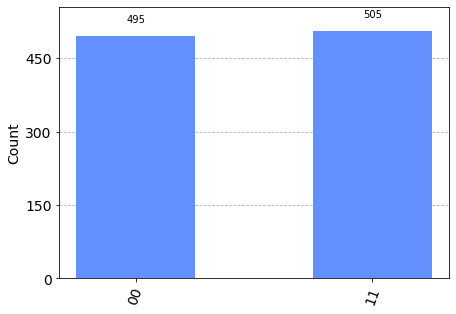

In [12]:
# Examine the statistics and plot histogram

print("Your result in the form of counts:", counts)
print("Thus, in 1000 shots, you get double blues " + str(counts['00']) + " times, and double reds " + str(counts['11']) + " times.")

plot_histogram(counts)
